In [24]:
%matplotlib inline
import matplotlib.pyplot as mpl
import numpy as np
import scipy as sp

### 参考
- [5次lagrange插值函数多项式](http://wenku.baidu.com/link?url=KtOKobewIlc6SJDlY5faeLRPhkxsZYIvGeDrLq59669TVaLZ21VWYkWqfbBYvmqFEBtzZPX58pcWTHvDAK_hgWatlfcDaNuvy4HMoiszh13)
- [分段低次插值](http://wenku.baidu.com/link?url=YmhFSfAigUOOd4nmxOq_1ZurlhHkesSzFUrYIhXdAdTqDAOMJ8mAHIqIzL3wRgF648zg7T_A4NEGH5ISTN_BC54WayWnxe8fiTz2r_pwbpy)

### 获取随机数据
```python
def getdata():
    a = np.zeros(10,np.double)
    b = np.zeros(10,np.double)
    for i in range(len(a)):
        a[i] = np.random.uniform(-255,255)
        b[i] = np.random.uniform(-255,255)
        print '(%f,%f)' %(a[i],b[i]),
    print 
    return a,b 

a = [0.4, 0.55, 0.65, 0.80, 0.95, 1.05]
b = [0.41075, 0.57815, 0.69675, 0.90, 1.00, 1.25382]
```

In [25]:
'使用课本数据'
a = [1, 2, 3, 4, 5, 6, 7]
b = [0.368, 0.135, 0.050, 0.018, 0.007, 0.002, 0.001]
L = []

### 构造插值多项式L1L2等

In [26]:
def createL(x,value):
    # L = [1 for i in range(0,len(x))]
    del L[:]
    for i in xrange(0,len(x)):
        L.append(1)
    
    # print L
    # 对于5次和6次，不满6次的不存在,以此类推
    for j in xrange(0, len(x)):
        for i in range(0, len(x)):
            if i == j:
                continue
            else:
                L[j] *= (value-x[i])/(x[j]-x[i])

[]
0.581
0.581


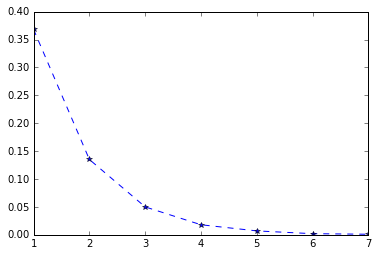

In [27]:
print L
def Lar(x,y,a):
    #t = np.zeros(len(a))
    #t = a.copy()
    ans = 0.0
    for i in range(len(y)):
        t = y[i]
        for j in range(len(L)):
            if i != j:
                t *= (a-x[j])/(x[i]-x[j])
        ans += t
    return ans

y2 = Lar(a,b,0.596)
print y2
y3 = Lar(a,b,0.99)
print y3
mpl.plot(a,b,'--*')

[2.4320505641562637, -4.198924905637311, 6.13070982478659, -5.772904981898535, 3.3465545910052135, -1.0909123922122104, 0.1534272997999892]
x=0.596 Larange插值为0.552160431566
[1.0247265788223623, -0.060874846266675046, 0.07647213274793754, -0.06808814477225004, 0.03833141816043753, -0.012272174596675008, 0.001705035904862501]
x=0.99 Larange插值为0.371724777406


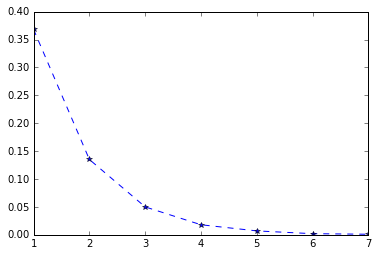

In [28]:
def Larange(x,y,value):
    #t = np.zeros(len(a))
    #t = a.copy()
    createL(x, value)
    print L
    ans = 0.0
    for i in range(len(x)):
        index = a.index(x[i])
        t = y[index]
        
        t *= L[i]
        ans += t
    return ans

y2 = Larange(a,b,0.596)
print u"x=0.596 Larange插值为%s" %y2
y3 = Larange(a,b,0.99)
print u"x=0.99 Larange插值为%s" %y3
mpl.plot(a,b,'--*')

In [29]:
def Fenduan2(x, y, value):
    F = []
    del F[:]
    for i in xrange(0,len(x)-1):
        if value >= x[i] and value <= x[i+1]:
            print "in fenduan"
            print x[i],x[i+1]
            if abs(value-x[i]) > abs(x[i+1] - x[i])/2:
                #get i,i+1,i+2
                if i+2 <= len(x):
                    F = x[i:i+3]
                else: F = x[len(x)-3:len(x)]
            else:
                #get i-1,i,i+1
                if i+1 <= len(x):
                    F = x[i-1:i+2]
                else: F = x[len(x)-3:len(x)]

    print F
    ans = Larange(F,y,value)
    return ans

y2 = Fenduan2(a,b,0.596)
print u"x=0.596 分段二次插值为%s" % y2
y3 = Fenduan2(a,b,0.99)
print u"x=0.99 分段二次插值为%s" % y3
y4 = Larange(a,b,1.8)
print u"Larange插值为%s" % y4
y5 = Fenduan2(a,b,1.8)
print u"三点插值为%s" % y5

[]
[]
x=0.596 分段二次插值为0.0
[]
[]
x=0.99 分段二次插值为0.0
[0.0512512, 1.2300288000000004, -0.5125120000000001, 0.37273599999999996, -0.192192, 0.0585728, -0.007884799999999999]
Larange插值为0.1647618944
in fenduan
1 2
[1, 2, 3]
[0.11999999999999997, 0.96, -0.07999999999999999]
三点插值为0.16976


In [30]:
def Fenduan(x, y, value):
    F = []
    del F[:]
    for i in xrange(0,len(x)-1):
        if value >= x[i] and value <= x[i+1]:
            if i+1 <= len(x):
                F = x[i:i+2]
            else: F = x[len(x)-2:len(x)]
            
    print u"F is:"
    print F
    ans = Larange(F,y,value)
    return ans

y6 = Fenduan(a,b,1.8)
print u"二点插值为%s" % y6

mpl.show()


F is:
[1, 2]
[0.19999999999999996, 0.8]
二点插值为0.1816
